# Twitter-US-Airlines-Sentiment

The following notebook demonstrate how to perform sentiment analysis using [ULMFiT](https://arxiv.org/abs/1801.06146) on twiter us airlines data set taken from [kaggle](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) competition.

## Sentiment Analysis

Sentiment analysis is a Natural Language Processing (NLP) problem which aims to classify what is the sentiment associated with a given inputed text. 

## ULMFiT 

### Why ULMFit

In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
# from sklearn.cross_validation import train_test_split
import numpy

In [2]:
Tweet= pandas.read_csv("./Tweets/Tweets.csv")
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
(len(Tweet)-Tweet.count())/len(Tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [4]:
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

In [5]:
Mood_count=Tweet['airline_sentiment'].value_counts()

Text(0.5, 1.0, 'Count of Moods')

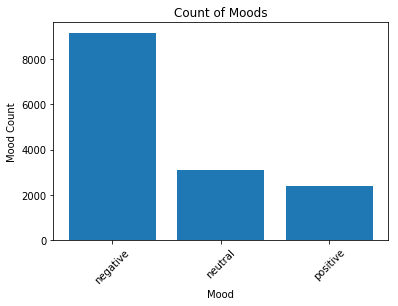

In [6]:
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [7]:
Tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

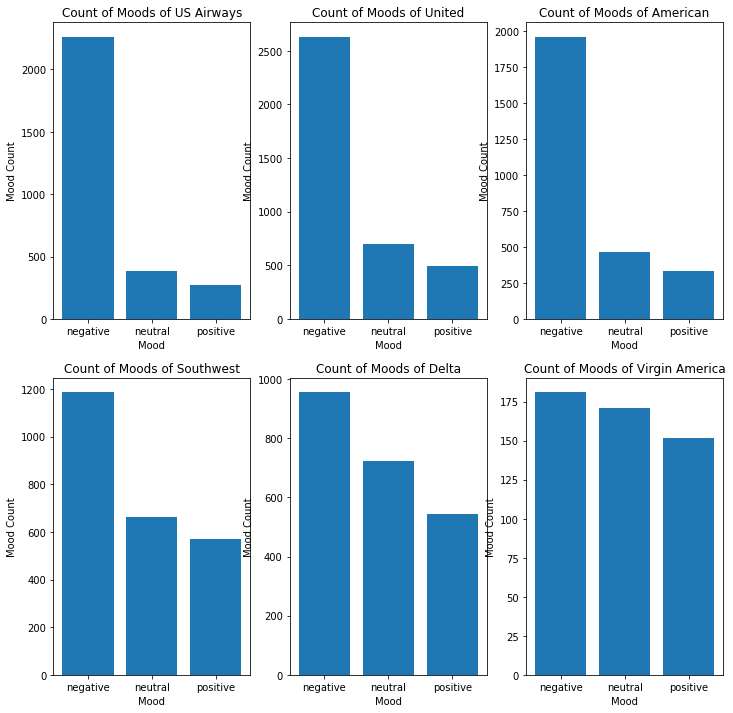

In [8]:
def plot_sub_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
    
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

In [9]:
NR_Count=dict(Tweet['negativereason'].value_counts(sort=False))

In [10]:
def NR_Count(Airline):
    if Airline=='All':
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pandas.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [11]:
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    plt.show()

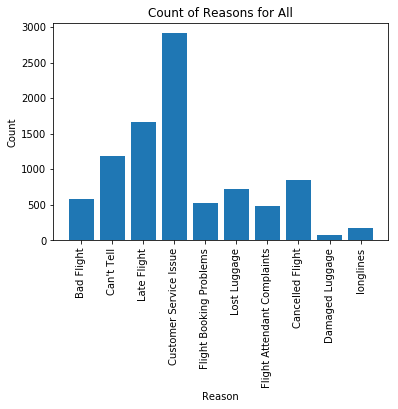

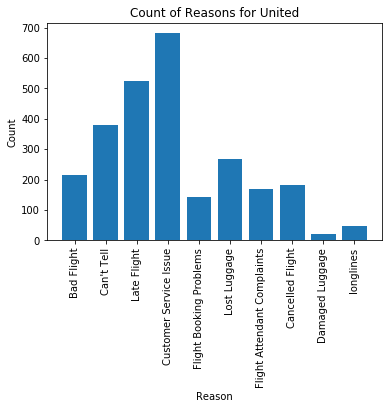

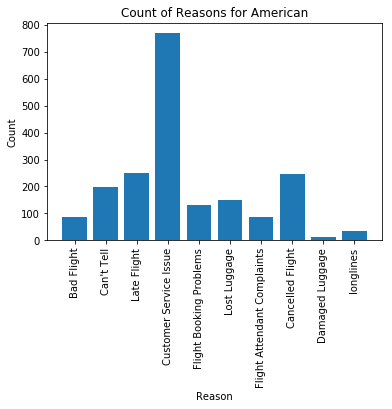

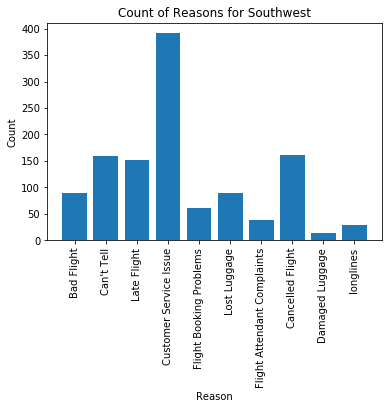

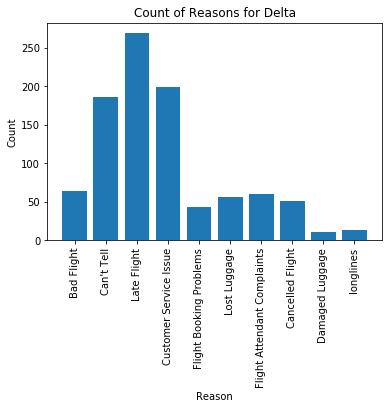

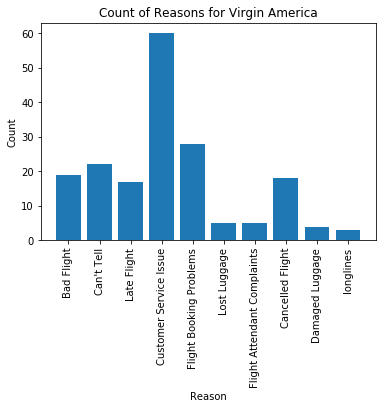

In [12]:
airline_names = ['All', 'United', 'American', 'Southwest', 'Delta', 'Virgin America']
for airline_name in airline_names:
    plot_reason(airline_name)

In [13]:
#!pip install wordcloud

In [14]:
from wordcloud import WordCloud,STOPWORDS

In [22]:
def plt_wordcloud(sentiment, confidence=-1):
    df=Tweet[Tweet['airline_sentiment']==sentiment]
    if confidence!=-1:
        df = df[df['airline_sentiment_confidence']<confidence]
    words = ' '.join(df['text'])
    cleaned_word = " ".join([word for word in words.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and word != 'RT'
                                ])
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
    
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

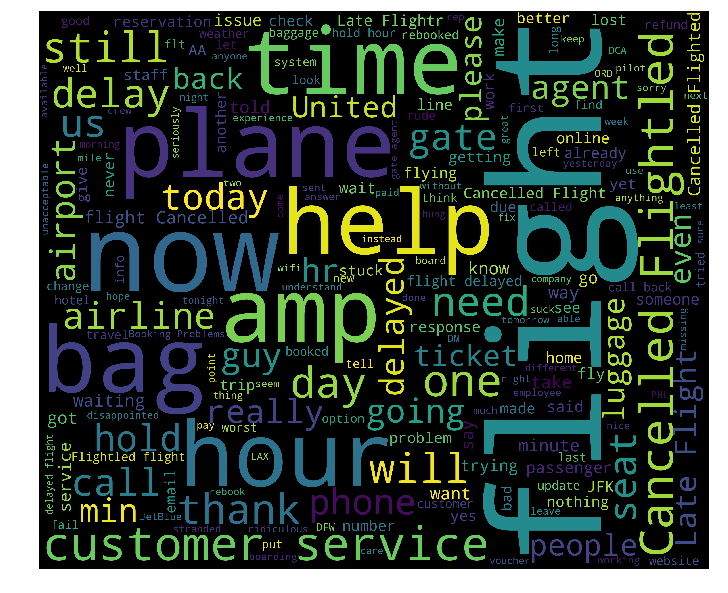

In [23]:
plt_wordcloud('negative')

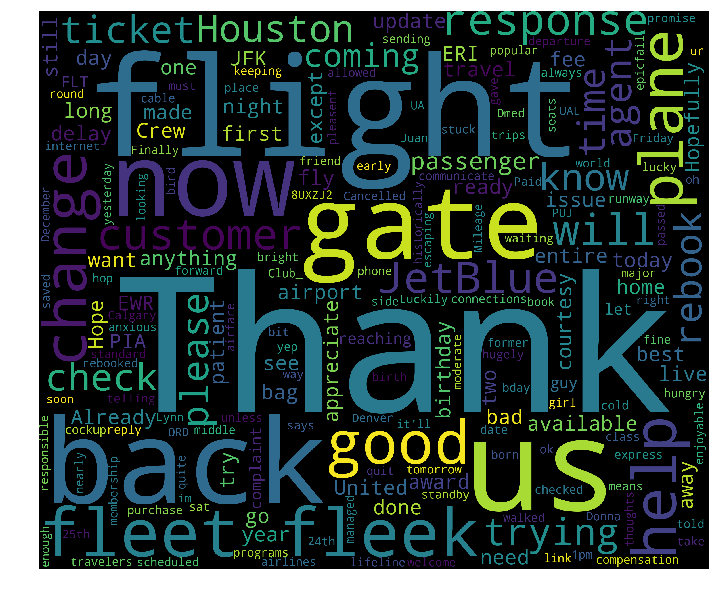

In [24]:
plt_wordcloud('negative',0.5)

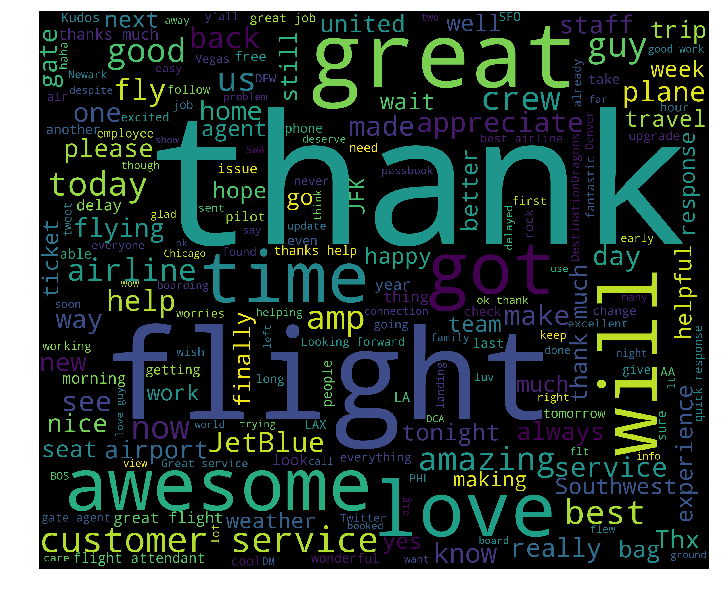

In [25]:
plt_wordcloud('positive')

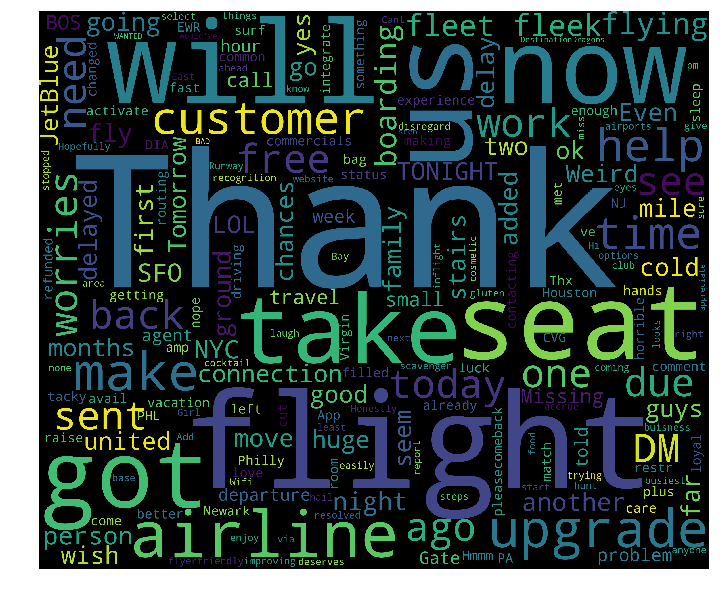

In [26]:
plt_wordcloud('positive',0.5)

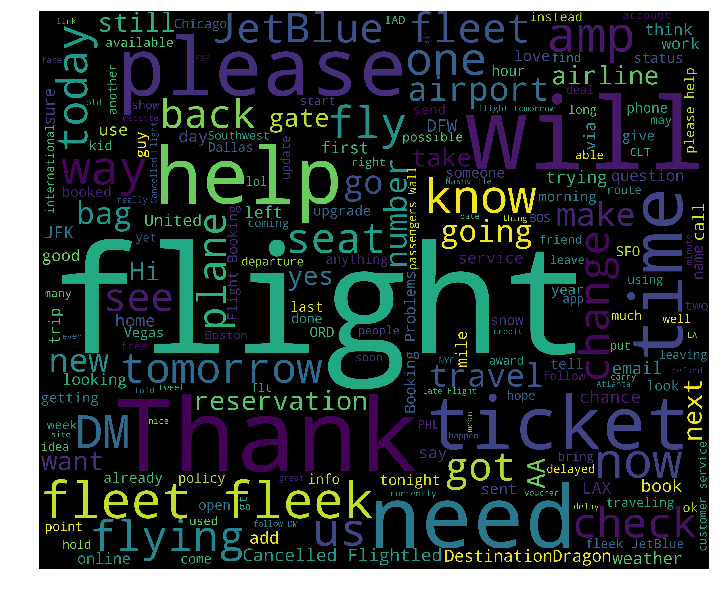

In [27]:
plt_wordcloud('neutral')

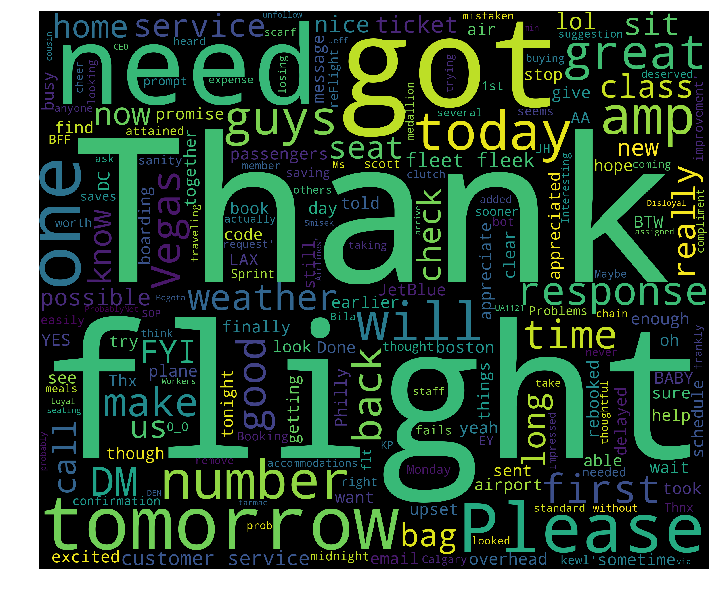

In [28]:
plt_wordcloud('neutral',0.5)

In [37]:
def label(x):
    if x=='negative':
        return -1
    elif x=='positive':
        return 1
    return 0
Tweet['label']=Tweet['airline_sentiment'].apply(label)
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment,label
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0,0
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1,1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0,0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),-1,-1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),-1,-1


In [38]:
df = pandas.DataFrame(Tweet[['label','text']])
df.head()

,label,text
0,0,@VirginAmerica What @dhepburn said.
1,1,@VirginAmerica plus you've added commercials t...
2,0,@VirginAmerica I didn't today... Must mean I n...
3,-1,@VirginAmerica it's really aggressive to blast...
4,-1,@VirginAmerica and it's a really big bad thing...


In [45]:
df['is_valid'] = False
#shuffle
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,label,text,is_valid
0,0,@JetBlue my mom wanted me to change her seat a...,False
1,-1,"@JetBlue All good, I just have 2 remind myself...",False
2,1,"@AmericanAir thank you AA, this is how I alway...",False
3,1,"@united I will, as soon as I am done with my a...",False
4,-1,"@united I received 1 bag last night, I am stil...",False


In [51]:
df[-int(df.shape[0]*0.3):].is_valid = True 
df[-int(df.shape[0]*0.3):].tail()
df.to_csv('texts.csv')

C:\Users\zvil\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [49]:
train_df = df[df['is_valid']==False]
valid_df = df[df['is_valid']==True]

In [34]:
from fastai.text import * 

In [60]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df=train_df,valid_df=valid_df, path="")

In [61]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df=train_df,valid_df=valid_df, vocab=data_lm.train_ds.vocab, bs=32, path="")

In [62]:
data_lm.save()
data_clas.save()

In [63]:
data_lm = TextLMDataBunch.load(path="")
data_clas = TextClasDataBunch.load(path="", bs=32)

In [ ]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

In [ ]:
learn.predict("I am", n_words=30)

In [ ]:
learn.save_encoder('ft_enc')

In [ ]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('ft_enc')

In [ ]:
data_clas.show_batch()

In [ ]:
learn.fit_one_cycle(1, 1e-2)

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

In [ ]:
learn.predict("This was a decent flight")

In [ ]:
learn.predict("Yesterday's flight was like riding a bull")

In [ ]:
learn.predict("Found the service to be fancy and elegant.")